# L2 Regularization (Ridge Regression)

http://blog.naver.com/PostView.nhn?blogId=ssdyka&logNo=221231456916 를 참고했으며 dataset으로 boston 주택가격 정보를 이용한다.

In [2]:
from sklearn.datasets import load_boston
import mglearn
boston = load_boston()
X,y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

X.shape : (506, 104)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_), end = '\n\n')
print("Linear regression 훈련 세트의 정확도 : {:.2f}".format(lr.score(X_train,y_train)))
print("Linear regression 테스트 세트의 정확도 : {:.2f}".format(lr.score(X_test,y_test)))

lr.coef_: [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e+00 -1.09538327e+01 -2.48389637e+01
 -1.16316264e+0

기울기 파라미터(w)는 가중치/계수라고 하며 coef_속성에 저장되어있다.
파라미터b는 편향/절편 값은 intercept_속성에 저장되어있다.

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Ridge regression 훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))
print("Ridge regression 테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

Ridge regression 훈련 세트의 정확도 : 0.87
Ridge regression 테스트 세트의 정확도 : 0.81


사용자는 alpha 매개변수로 훈련 센트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다. (기본값 alpha=1.0)
alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.

alpha값을 바꿔서 확인해보자.

In [21]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("alpha = 10 훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("alpha = 10 테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test,y_test)))

# 반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("alpha = 0.1 훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("alpha = 0.1 테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test,y_test)))

alpha = 10 훈련 세트의 정확도 : 0.77
alpha = 10 테스트 세트의 정확도 : 0.73
alpha = 0.1 훈련 세트의 정확도 : 0.92
alpha = 0.1 테스트 세트의 정확도 : 0.82


alpha값에 다른 coef속성(w)의 변화를 그래프로 확인해보자.
alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.

alpha값이 높으면 제약이 많으므로 작은값일 때 보다 절댓값의 크기가 작을것이다.

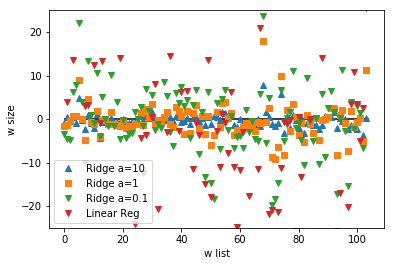

In [24]:
import matplotlib.pyplot as plt
plt.plot(ridge10.coef_,'^',label="Ridge a=10")
plt.plot(ridge.coef_,'s',label="Ridge a=1")
plt.plot(ridge01.coef_,'v',label="Ridge a=0.1")
plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
plt.show()

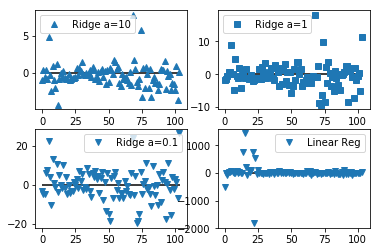

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(ridge10.coef_,'^',label="Ridge a=10")
ax1.legend(); ax1.hlines(0,0,len(lr.coef_))
ax2.plot(ridge.coef_,'s',label="Ridge a=1")
ax2.legend(); ax2.hlines(0,0,len(lr.coef_))
ax3.plot(ridge01.coef_,'v',label="Ridge a=0.1")
ax3.legend(); ax3.hlines(0,0,len(lr.coef_))
ax4.plot(lr.coef_,'v',label="Linear Reg")
ax4.legend(); ax4.hlines(0,0,len(lr.coef_))

plt.show()

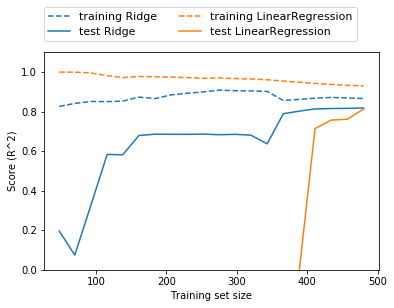

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
mglearn.plots.plot_ridge_n_samples()

위 그림을 보면 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련세트의 점수가 테스트 세트의 점수보다 높다. 릿지 회귀에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.

그러나 테스트 데이터에서는 릿지의 점수가 더 높으며, 특별히 작은 데이터셋에서는 더 그렇다.

두 모델의 성능은 데이터가 많아질수록 좋아지고 말단에서는 선형 회귀가 릿지 회귀를 따라잡는다.

--> 데이터를 충분히 주면 규제 항은 중요성이 떨어진다.

# L1 Regularization

In [9]:
from sklearn.datasets import load_boston
import mglearn
boston = load_boston()
X,y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

X.shape : (506, 104)


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lasso = Lasso().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.29
테스트 세트의 정확도 : 0.21
사용한 특성의 수 : 4
사용한 max_iter : 34


104개의 특성 중 4개만 사용한 것을 볼 수 있다.(과소적합)

In [12]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("alpha = 0.01 훈련 세트의 정확도 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("alpha = 0.01 테스트 세트의 정확도 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("alpha = 0.01 사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))
print("alpha = 0.01 사용한 max_iter : {}".format(lasso001.n_iter_))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("alpha = 0.0001 훈련 세트의 정확도 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("alpha = 0.0001 테스트 세트의 정확도 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("alpha = 0.0001 사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))
print("alpha = 0.0001 사용한 max_iter : {}".format(lasso00001.n_iter_))

alpha = 0.01 훈련 세트의 정확도 : 0.90
alpha = 0.01 테스트 세트의 정확도 : 0.77
alpha = 0.01 사용한 특성의 수 : 33
alpha = 0.01 사용한 max_iter : 1886
alpha = 0.0001 훈련 세트의 정확도 : 0.95
alpha = 0.0001 테스트 세트의 정확도 : 0.64
alpha = 0.0001 사용한 특성의 수 : 96
alpha = 0.0001 사용한 max_iter : 41420


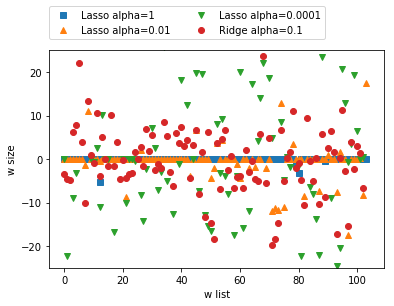

In [13]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.show()

alpha=1일때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작다는것을 알 수 있다.
alpha=0.01로 줄이면 대부분의 특성이 0이되는 분포를 얻게 된다.
alpha=0.0001로 줄이면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 된다.

Ridge 모델은 alpha=0.01인 라쏘 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다.